In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
linear_index = ['POLS', 'Lasso', 'Ridge', 'Elastic Net']
r2_linear  =pd.DataFrame([
    [-1.3151, -0.3272, 0.131, 0.2364, 0.0689],
    [0.1984, 0.1822, 0.1774, 0.1606, -0.0381],
    [0.0143, -0.0772, 0.1506, 0.1732, 0.1589],
    [0.1917, 0.1806, 0.1768, -0.0484, -0.0381]
    ])
r2_linear.columns = ['50','100','250','500','1000']
r2_linear.index = linear_index

rf_index = ['RF10', 'RF25', 'RF50', 'RF100', 'RF150', 'RF200']
r2_rf = pd.DataFrame([
    [0.1939, 0.0089, 0.2052, 0.1732, 0.1317],
    [0.2439, 0.1691, 0.2425, 0.2170, 0.1879],
    [0.2501, 0.2078, 0.2622, 0.2407, 0.2048],
    [0.2575, 0.2202, 0.2704, 0.2511, 0.2154],
    [0.2586, 0.2142, 0.2695, 0.2558, 0.2183],
    [0.2624, 0.2083, 0.2717, 0.2587, 0.2251]
    ])
r2_rf.columns = ['50','100','250','500','1000']
r2_rf.index = rf_index

nn_index = ['NN1', 'NN2', 'NN3', 'NN4', 'NN5', 'NN6']
r2_nn = pd.DataFrame([
    [0.0377, 0.2334, 0.2664, 0.1626, 0.1931],
    [0.1822, 0.2233, 0.2338, 0.1470, 0.1727],
    [0.1175, 0.2943, 0.2213, 0.2256, 0.2033],
    [0.1502, 0.2485, 0.2577, 0.2389, 0.1972],
    [0.1213, 0.1898, 0.2234, 0.2012, 0.2186],
    [0.2074, 0.1931, 0.2118, 0.2531, 0.1662]
    ])
r2_nn.columns = ['50','100','250','500','1000']
r2_nn.index = nn_index


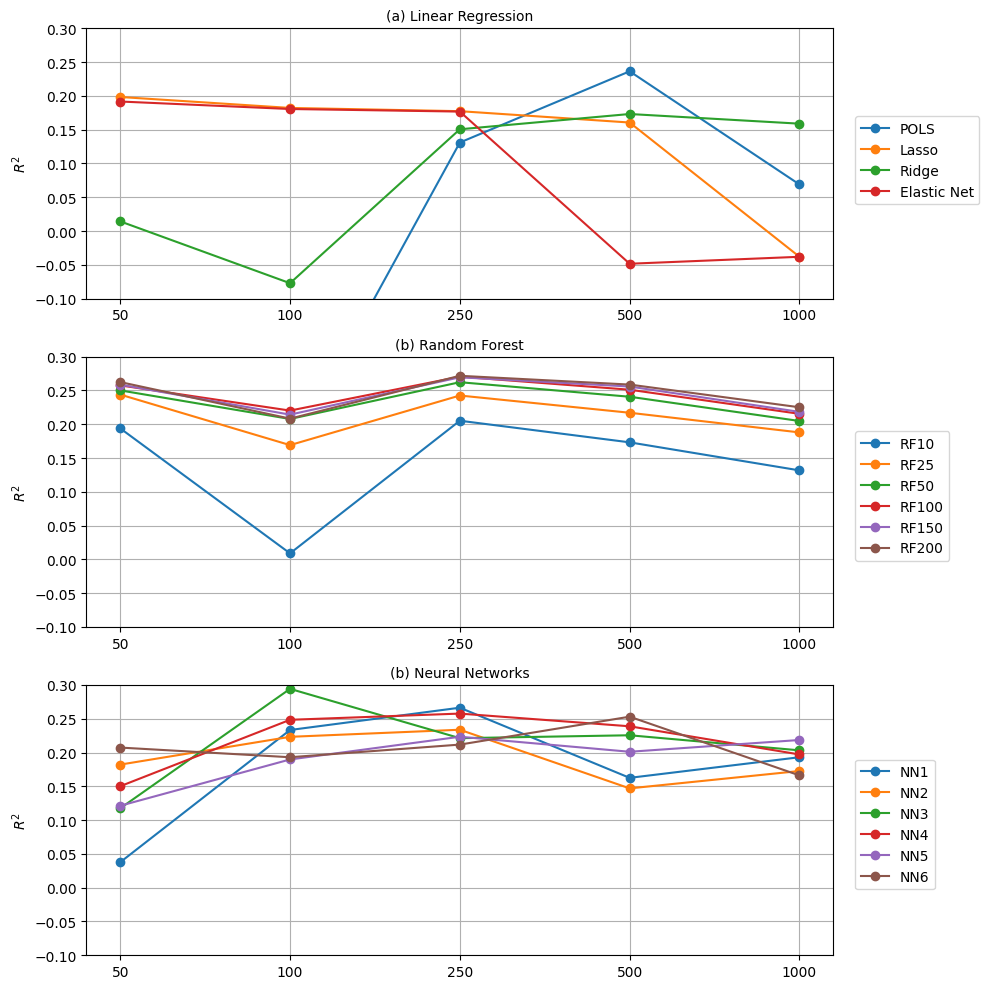

In [3]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
for index in linear_index:
    plt.plot(['50', '100', '250', '500', '1000'], r2_linear.loc[index], label=index, marker='o')
plt.title('(a) Linear Regression', size = 10)
plt.ylabel('$R^2$')
plt.grid(True)
plt.ylim(-0.1, 0.3)  # Set the y-axis limits according to your data range
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.7))

# Plot for R-squared values
plt.subplot(3, 1, 2)
for index in rf_index:
    plt.plot(['50', '100', '250', '500', '1000'], r2_rf.loc[index], label=index, marker='o')
plt.title('(b) Random Forest', size = 10)
plt.ylabel('$R^2$')
plt.grid(True)
plt.ylim(-0.1, 0.3)  # Set the y-axis limits according to your data range
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.75))

# Plot for R-squared values
plt.subplot(3, 1, 3)
for index in nn_index:
    plt.plot(['50', '100', '250', '500', '1000'], r2_nn.loc[index], label=index, marker='o')
plt.title('(b) Neural Networks', size = 10)
plt.ylabel('$R^2$')
plt.grid(True)
plt.ylim(-0.1, 0.3)  # Set the y-axis limits according to your data range
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.75))
plt.tight_layout()
plt.savefig('plots/r2total.png')
plt.show()


### Hyperparameters

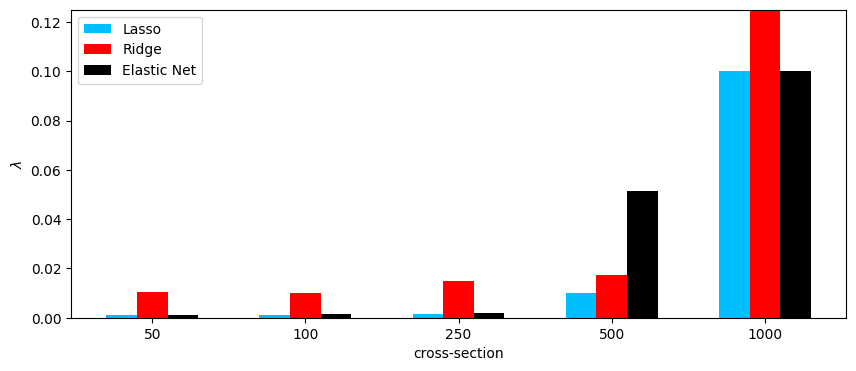

In [3]:
# Hyperparameter plot
x_values = ['50', '100', '250', '500', '1000']
lasso_lambdas = [0.0012, 0.0010, 0.0015, 0.0100, 0.100]
ridge_lambdas = [0.01045, 0.01000, 0.01503, 0.01747,4651.5888]
en_lambdas = [0.0012, 0.0015, 0.0019, 0.05130,0.1000]
x_pos = np.arange(len(x_values))

bar_width = 0.2
plt.figure(figsize=(10, 4))  # Set the figure size
plt.bar(x_pos - bar_width, lasso_lambdas, width=bar_width, color='deepskyblue', align='center', label='Lasso')
plt.bar(x_pos, ridge_lambdas, width=bar_width, color='red', align='center', label='Ridge')
plt.bar(x_pos + bar_width, en_lambdas, width=bar_width, color='black', align='center', label='Elastic Net')
plt.xlabel('cross-section')
plt.ylabel('$\lambda$')
plt.xticks(x_pos, x_values) 
plt.ylim(0, 0.125)  
plt.legend()
os.makedirs("plots", exist_ok=True)
plt.savefig('plots/hyperparameters.jpg')
plt.show()

### Benchmark Models

In [12]:
models = ['POLS', 'Lasso', 'Ridge', 'EN', 'RF100', 'RF150', 'RF200', 'NN4', 'NN5', 'NN6']
capm = pd.DataFrame([
    [0.3310, 0.3414, 0.3035, 0.2782, 0.2065],
    [0.2423, 0.2221 , 0.2057 , 0.1950 , 0.1597],
    [0.2458, 0.2269 , 0.2100 , 0.1989 , 0.1629],
    [0.2464, 0.2290 , 0.212 , 0.2007 , 0.1644],
    [0.3183, 0.3031, 0.2582, 0.2237, 0.1716],
    [0.3193, 0.3036, 0.2577, 0.2241, 0.1719],
    [0.3188, 0.3040, 0.2576, 0.2241, 0.1720],
    [0.3265, 0.3192, 0.3021, 0.2780, 0.2035],
    [0.3266, 0.3246, 0.2910, 0.2605, 0.2118],
    [0.3265, 0.3089, 0.3050, 0.2772, 0.2129]
])

# UPDATE
ff3 = pd.DataFrame([
    [0.3326, 0.3568, 0.3218, 0.3047, 0.2395],
    [0.2423 , 0.2229 , 0.2057 , 0.1970 , 0.1720],
    [0.2484 , 0.2367 , 0.2182 , 0.2118 , 0.1833],
    [0.2461 , 0.2329 , 0.2138 , 0.2079 , 0.1804],
    [0.3188, 0.3237, 0.3024, 0.2893, 0.2216],
    [0.3190, 0.3250, 0.3021, 0.2889, 0.2219],
    [0.3190, 0.3250, 0.3021, 0.2889, 0.2219],
    [0.3233, 0.3331, 0.3131, 0.2965, 0.2066],
    [0.2514, 0.3257, 0.2944, 0.2852, 0.2282],
    [0.3100, 0.3243, 0.2919, 0.3014, 0.2297]
])

# UPDATE
ff5 = pd.DataFrame([
    [0.3371, 0.3565, 0.3214, 0.3037, 0.2386],
    [0.2423 , 0.2229 , 0.2057 , 0.1970 , 0.1720],
    [0.2499 , 0.2367 , 0.2183 , 0.2121 , 0.1836],
    [0.2461 , 0.2329 , 0.2138 , 0.2079 , 0.1804],
    [0.3272, 0.3164, 0.3037, 0.2840, 0.2169],
    [0.3286, 0.3160, 0.3047, 0.2833, 0.2177],
    [0.3287, 0.3168, 0.3047, 0.2833, 0.2177],
    [0.3266, 0.3347, 0.2944, 0.2989, 0.1949],
    [0.2325, 0.3315, 0.2894, 0.2734, 0.2297],
    [0.3017, 0.3329, 0.3162, 0.2522, 0.2345]
])

capm.columns=[['50','100','250','500','1000']]
ff3.columns=[['50','100','250','500','1000']]
ff5.columns=[['50','100','250','500','1000']]
capm.index = models
ff3.index = models
ff5.index = models


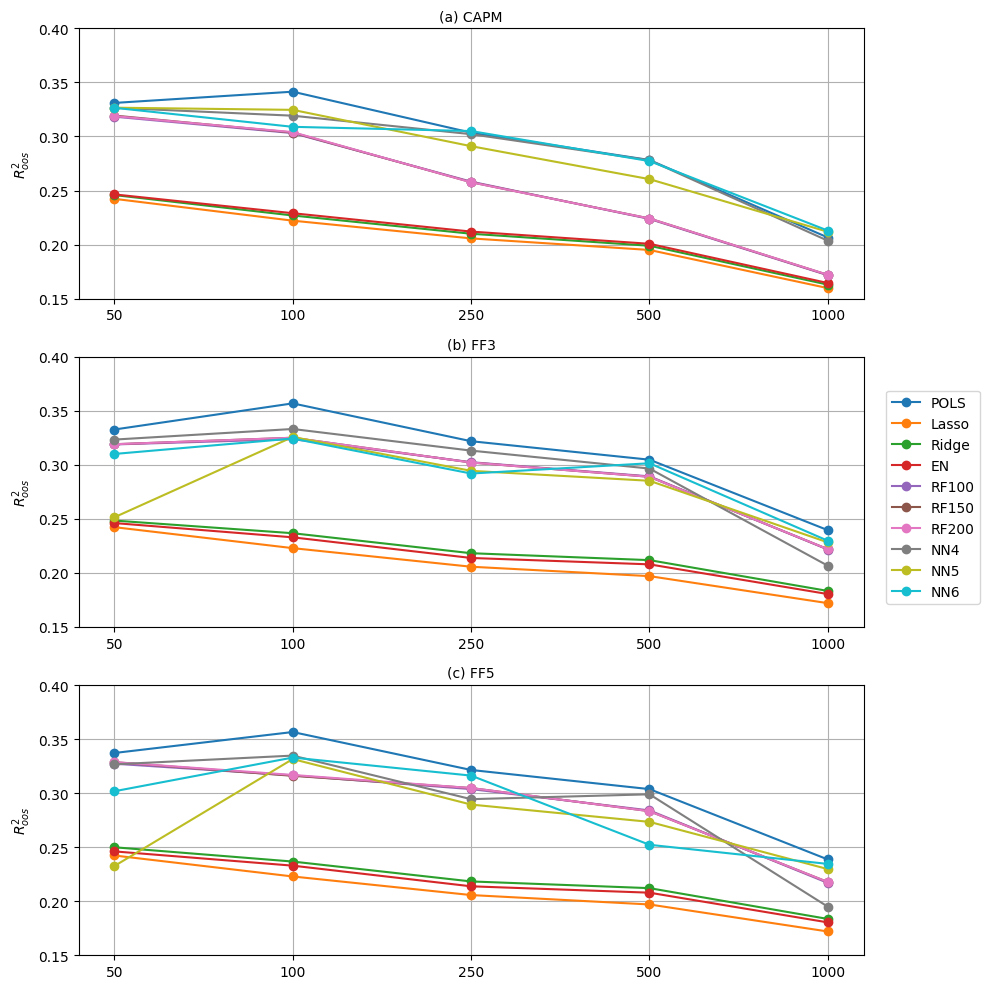

In [13]:
# Extracting values for each model
models = ['POLS', 'Lasso', 'Ridge', 'EN', 'RF100', 'RF150', 'RF200', 'NN4', 'NN5', 'NN6']
# Extracting values for each model and lagged return period
capm_values = capm.values
ff3_values = ff3.values
ff5_values = ff5.values

# Creating separate line plots for each model
plt.figure(figsize=(10, 10))

# Plot for CAPM
plt.subplot(3, 1, 1)
for model in models:
    plt.plot(['50','100','250','500','1000'], capm_values[models.index(model)], label=model, marker = 'o')
plt.title('(a) CAPM', size = 10)
plt.ylabel('$R^2_{oos}$')
plt.ylim(0.15, 0.4)  # Set the y-axis limits
plt.grid(True)

# Plot for FF3
plt.subplot(3, 1, 2)
for model in models:
    plt.plot(['50','100','250','500','1000'], ff3_values[models.index(model)], label=model, marker = 'o')
plt.title('(b) FF3', size = 10)
plt.ylabel('$R^2_{oos}$')
plt.ylim(0.15, 0.4)  # Set the y-axis limits
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.9))
plt.grid(True)

# Plot for FF5
plt.subplot(3, 1, 3)
for model in models:
    plt.plot(['50','100','250','500','1000'], ff5_values[models.index(model)], label=model, marker = 'o')
plt.title('(c) FF5', size = 10)
plt.ylabel('$R^2_{oos}$')
plt.ylim(0.15, 0.4)  # Set the y-axis limits
plt.grid(True)
plt.savefig('plots/r2bm.png')
plt.tight_layout()
plt.show()
